In [1]:
import function as f

9
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path
Please Check Directory Path


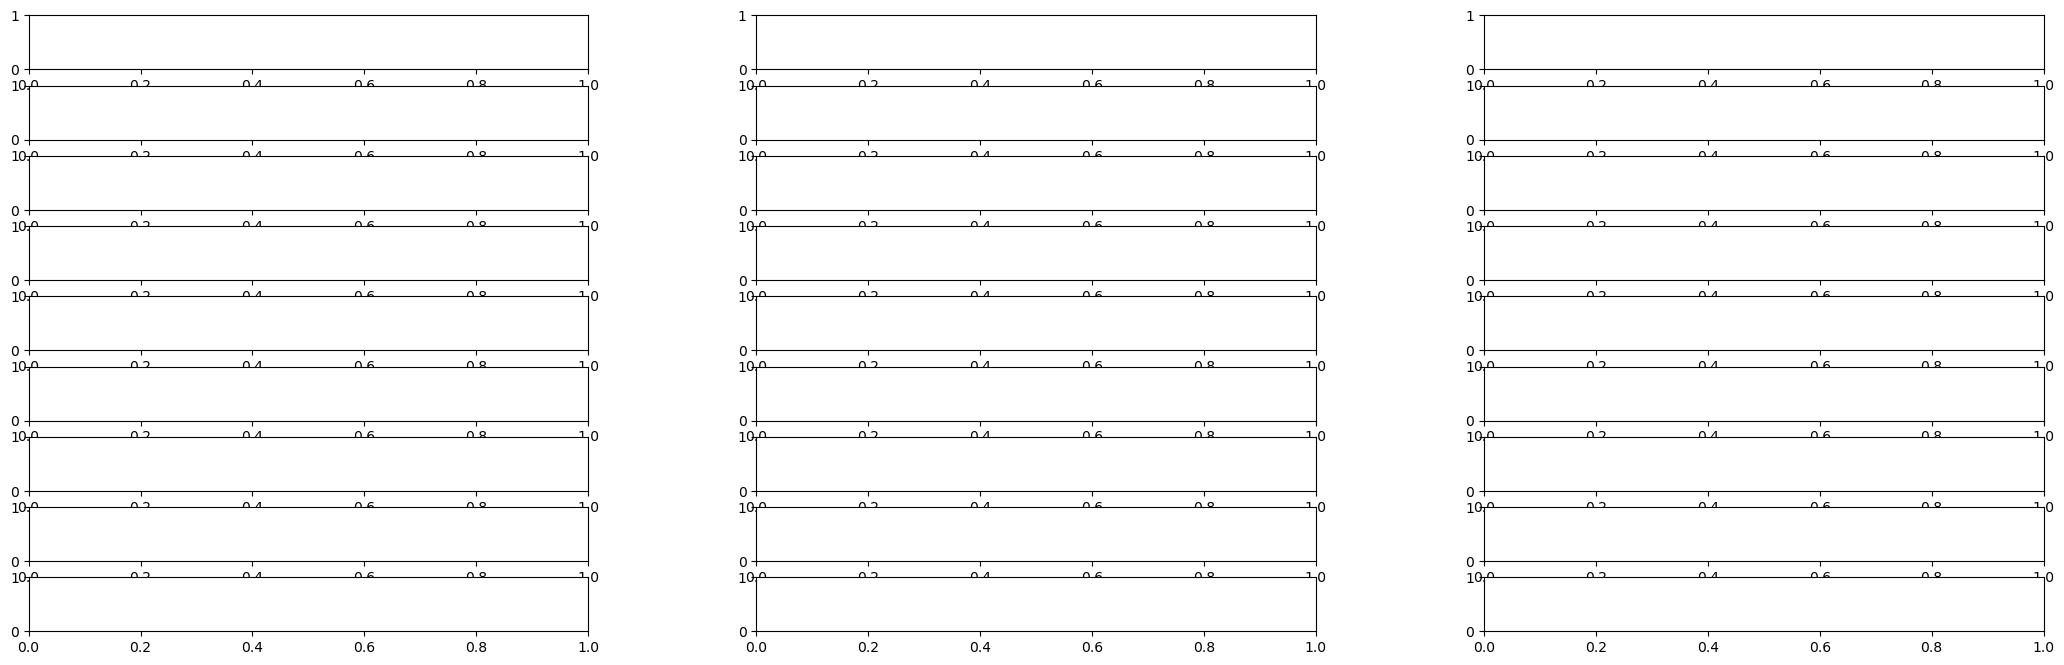

In [2]:
directory_path ='../Simulation/Assets/Results/Congestion'
x_col_name = 'alpha_1'
y_col_name = 'Total Time'

x_label = "alpha_1"
y_label = "Completion Time"
title = "Completion Time by alpha_1"

col_num = 3

f.create_subplot_completion(directory_path, x_col_name, y_col_name, x_label, y_label, title, col_num, (26,8))